In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nbimporter
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import matplotlib.pyplot as plt
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
from preprocessamento import preprocessar

Importing Jupyter notebook from preprocessamento.ipynb


In [3]:
data_2016 = pd.read_csv('respostas_2016.csv')

In [4]:
dados_2016 = preprocessar(data_2016)

In [5]:
#enumerando as colunas
cont = 1
for item in dados_2016.columns:
    print(item + " - " + str(cont))
    cont += 1

Sexo - 1
situacao - 2
filhos - 3
renda - 4
quem_você_está_morando_atualmente - 5
estado_civil - 6
residindo_em - 7
distancia_ufc_casa - 8
meio_de_transporte - 9
apresenta_necessidade_educacional_especial - 10
tipo_escola_ensino_fundamental - 11
tipo_escola_ensino_medio - 12
forma_ingresso_ufc_qxd - 13
atividade_remunerada - 14
participa_algum_tipo_atividade_organização_associação - 15
afinidade_linguagens - 16
afinidade_humanas - 17
afinidade_matematica - 18
afinidade_natureza - 19
estudo_fora_sala - 20
motivacao_curso - 21
tarefa_durante_curso - 22
dedicacao_exigida - 23
disciplinas_ofertadas - 24
competencias_habilidades_requiridas - 25
condicoes_mercado_trabalho - 26
competencias_area_ti - 27
realizacao_profissional - 28
concluir_curso_nessa_instituicao - 29
nao_mudaria_de_curso - 30


In [6]:
dados_2016 = dados_2016.drop('situacao', 1)

- entender o kmeans
    - A implementação do scikit utiliza pontos randômicos
- entender medidas de distâncias
    - o kmeans na implementação do sci-kit usa o Lloyd’s algorithm que por sua vez usa distância euclidiana, 
- avaliação do cluster e da quantidade de cluster
- pensar em uma visualicao para os clusteres
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [7]:
#enumerando as colunas
cont = 1
for item in dados_2016.columns:
    print(item + " - " + str(cont))
    cont += 1

Sexo - 1
filhos - 2
renda - 3
quem_você_está_morando_atualmente - 4
estado_civil - 5
residindo_em - 6
distancia_ufc_casa - 7
meio_de_transporte - 8
apresenta_necessidade_educacional_especial - 9
tipo_escola_ensino_fundamental - 10
tipo_escola_ensino_medio - 11
forma_ingresso_ufc_qxd - 12
atividade_remunerada - 13
participa_algum_tipo_atividade_organização_associação - 14
afinidade_linguagens - 15
afinidade_humanas - 16
afinidade_matematica - 17
afinidade_natureza - 18
estudo_fora_sala - 19
motivacao_curso - 20
tarefa_durante_curso - 21
dedicacao_exigida - 22
disciplinas_ofertadas - 23
competencias_habilidades_requiridas - 24
condicoes_mercado_trabalho - 25
competencias_area_ti - 26
realizacao_profissional - 27
concluir_curso_nessa_instituicao - 28
nao_mudaria_de_curso - 29


In [105]:
#rodando o kmeans para k=2 até k=10

In [8]:
#com k=2
modelo1 = KMeans(n_clusters=2).fit(dados_2016)
#modelo1.cluster_centers_

In [9]:
#com k=3
modelo2 = KMeans(n_clusters=3).fit(dados_2016)
#modelo2.cluster_centers_

In [10]:
#com k=4
modelo3 = KMeans(n_clusters=4).fit(dados_2016)
#modelo3.cluster_centers_

In [11]:
#com k=5
modelo4 = KMeans(n_clusters=5).fit(dados_2016)
#modelo4.cluster_centers_

In [12]:
#com k=6
modelo5 = KMeans(n_clusters=6).fit(dados_2016)
#modelo5.cluster_centers_

In [13]:
#com k=7
modelo6 = KMeans(n_clusters=7).fit(dados_2016)
#modelo6.cluster_centers_

In [14]:
#com k=8
modelo7 = KMeans(n_clusters=8).fit(dados_2016)
#modelo7.cluster_centers_

In [15]:
#com k=9
modelo8 = KMeans(n_clusters=9).fit(dados_2016)
#modelo8.cluster_centers_

In [16]:
#com k=10
modelo9 = KMeans(n_clusters=10).fit(dados_2016)
#modelo10.cluster_centers_

For n_clusters = 2 The average silhouette_score is : 0.209675687809


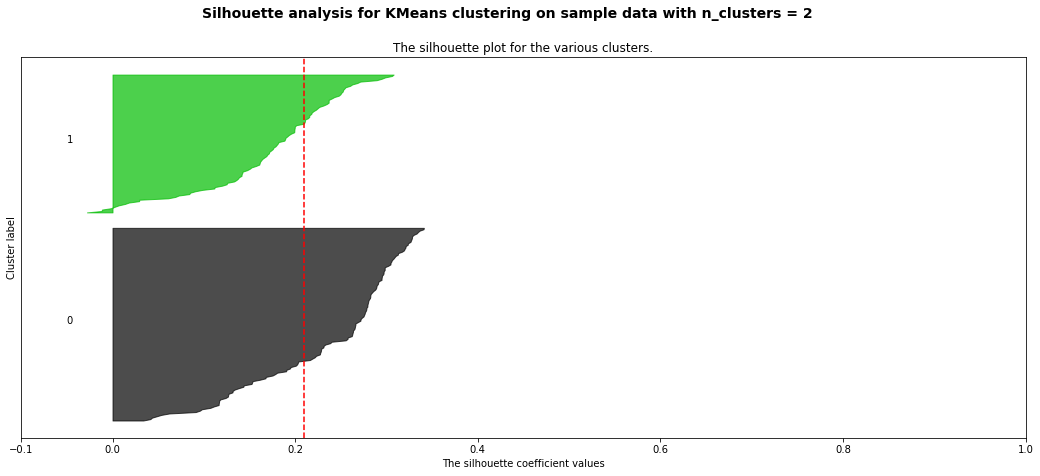

For n_clusters = 3 The average silhouette_score is : 0.135898315313


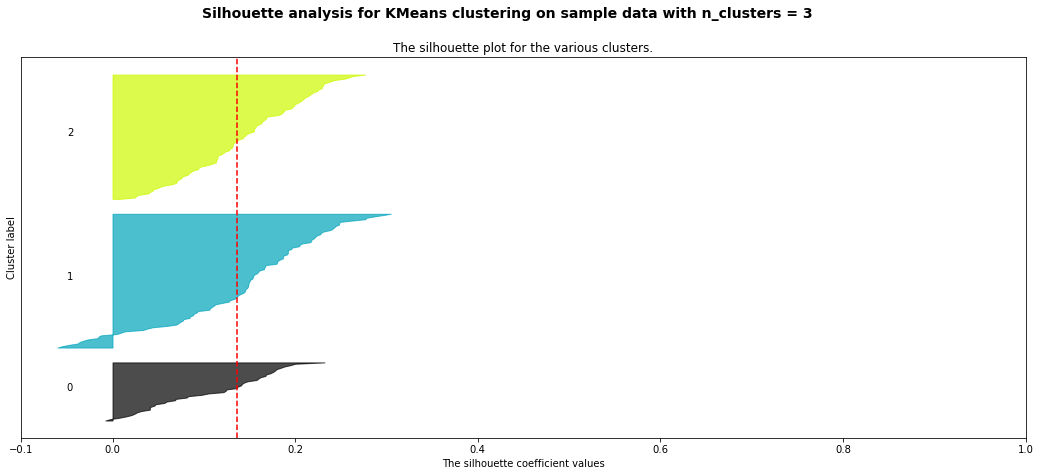

For n_clusters = 4 The average silhouette_score is : 0.108350351496


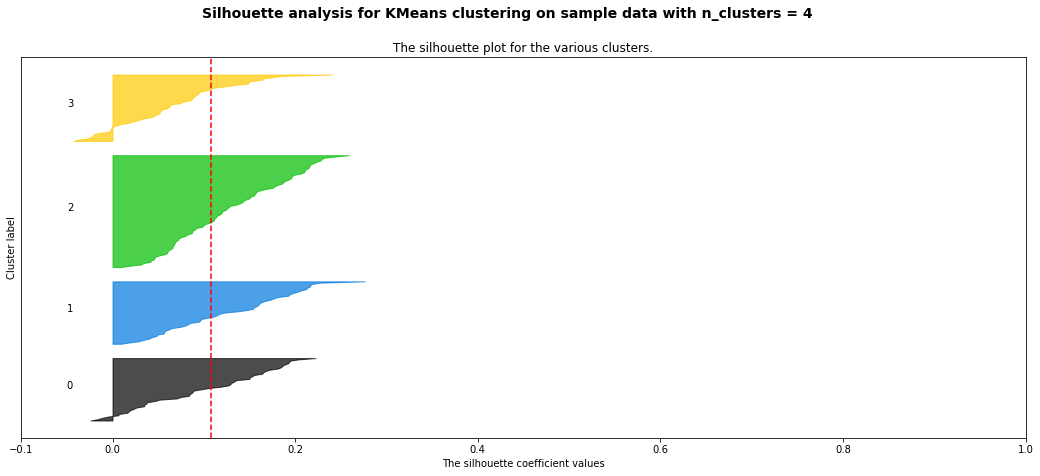

For n_clusters = 5 The average silhouette_score is : 0.097821563768


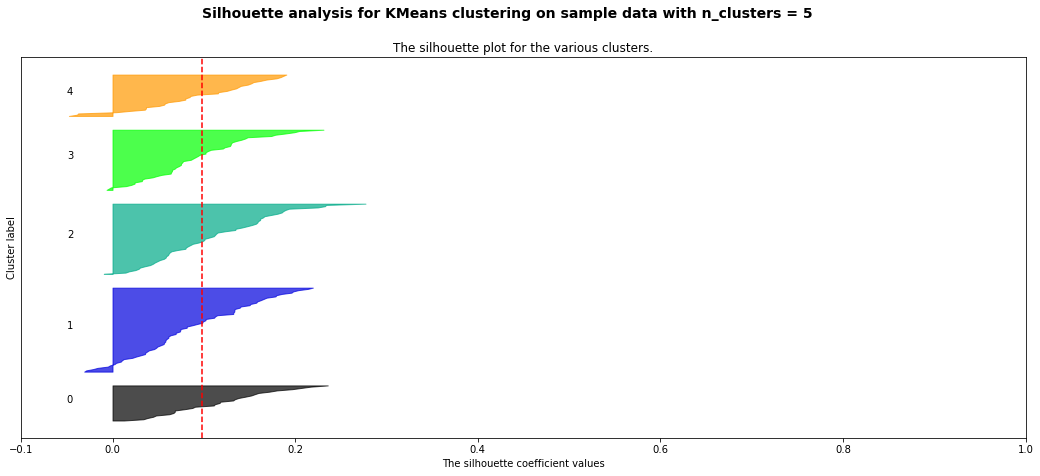

For n_clusters = 6 The average silhouette_score is : 0.0998781688145


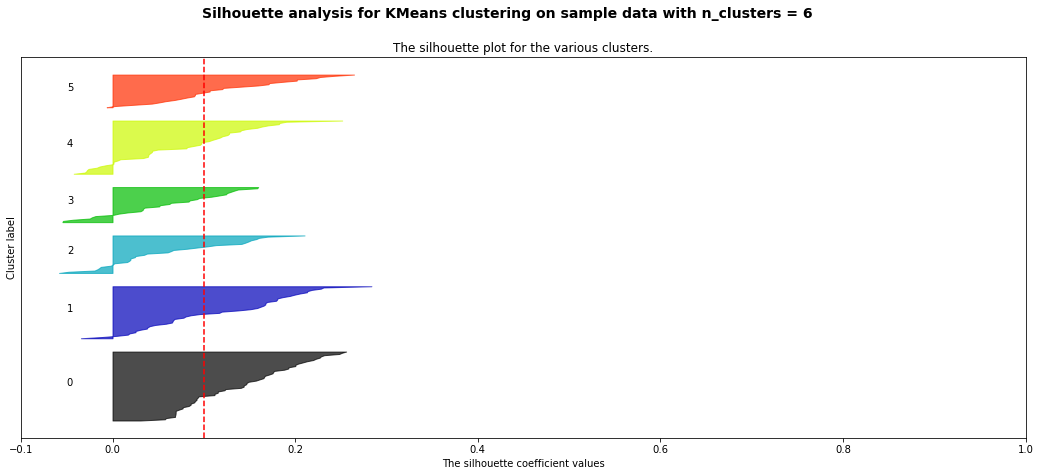

For n_clusters = 7 The average silhouette_score is : 0.100051052799


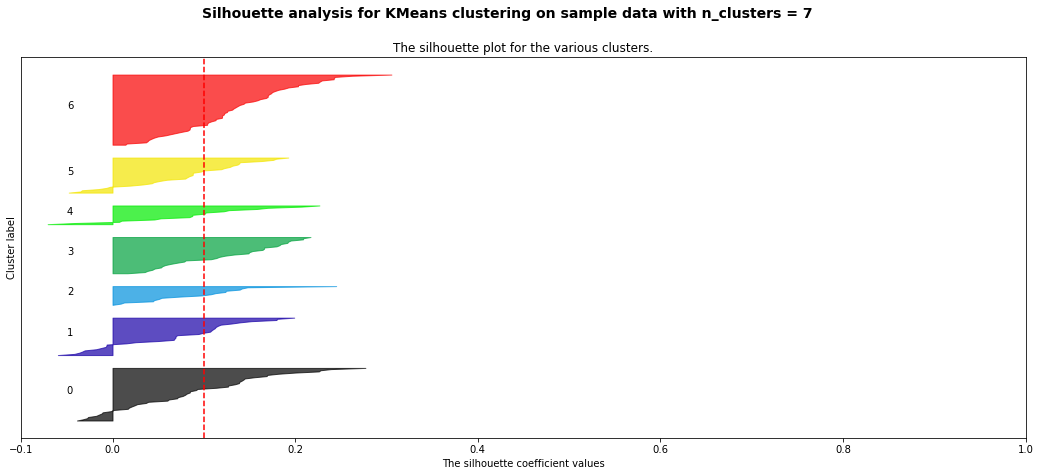

For n_clusters = 8 The average silhouette_score is : 0.0931376028086


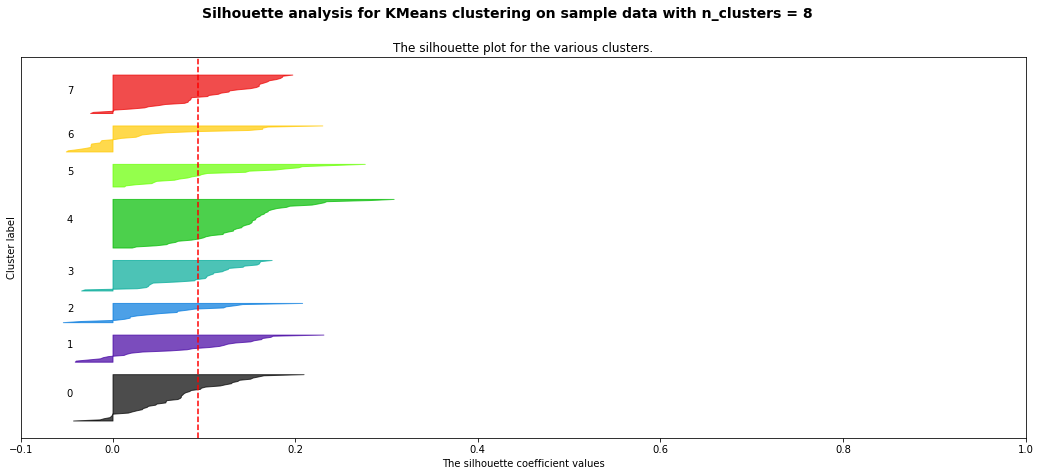

For n_clusters = 9 The average silhouette_score is : 0.0886131721473


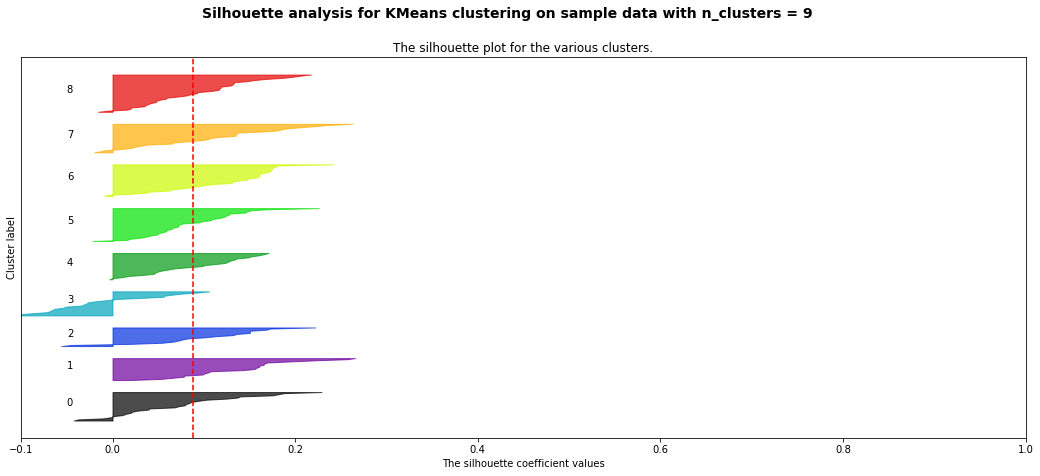

In [17]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # cria um plot
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # define até onde o gráfico vai
    ax1.set_xlim([-0.1, 1])
    
    # inicializa o cluster com k = n_clusters
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(dados_2016)
    
    # O silhouette_score nos dá um valor média para todos os clusteres
    silhouette_avg = silhouette_score(dados_2016, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # calcula os valores de cada objetivo
    sample_silhouette_values = silhouette_samples(dados_2016, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # junta os silhouette scores para todos os elementos dentro do cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()    